## Pre-trained Models

Incredibly, many people from across the world have shared the results of their hard work building and training machine learning models, so that you can take their working models straight off the shelf.

> You can download many model architectures and pre-trained weights from online

One of the largest collections of machine learning models can be found on [HuggingFace](https://huggingface.co/models).

Let's download HuggingFace and some related libraries before we start playing with some of those models.

In [1]:
!pip install transformers --quiet
!pip install timm --quiet
!pip install pillow --quiet
!pip install requests --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 3.4 MB/s eta 0:00:00


Many of the examples come with implementation code that you can copy directly (always assuming that you understand what it does beforehand, of course).

[Here](https://huggingface.co/SenseTime/deformable-detr) in the documentation, you can find example code that gets the Deformable DETR object detection model from HuggingFace and uses it to make a prediction.

Copying that below allows us to run the model in our own environment:

In [2]:
from transformers import AutoImageProcessor, DeformableDetrForObjectDetection
import torch
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

processor = AutoImageProcessor.from_pretrained("SenseTime/deformable-detr")
model = DeformableDetrForObjectDetection.from_pretrained("SenseTime/deformable-detr")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.7
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.7)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.8/dist-packages/transformers/models/deformable_detr/image_processing_deformable_detr.py:792: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


Detected cat with confidence 0.8 at location [16.5, 52.84, 318.25, 470.78]
Detected cat with confidence 0.789 at location [342.19, 24.3, 640.02, 372.25]


In [3]:
!pip install -U yolov5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.0/956.0 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 M

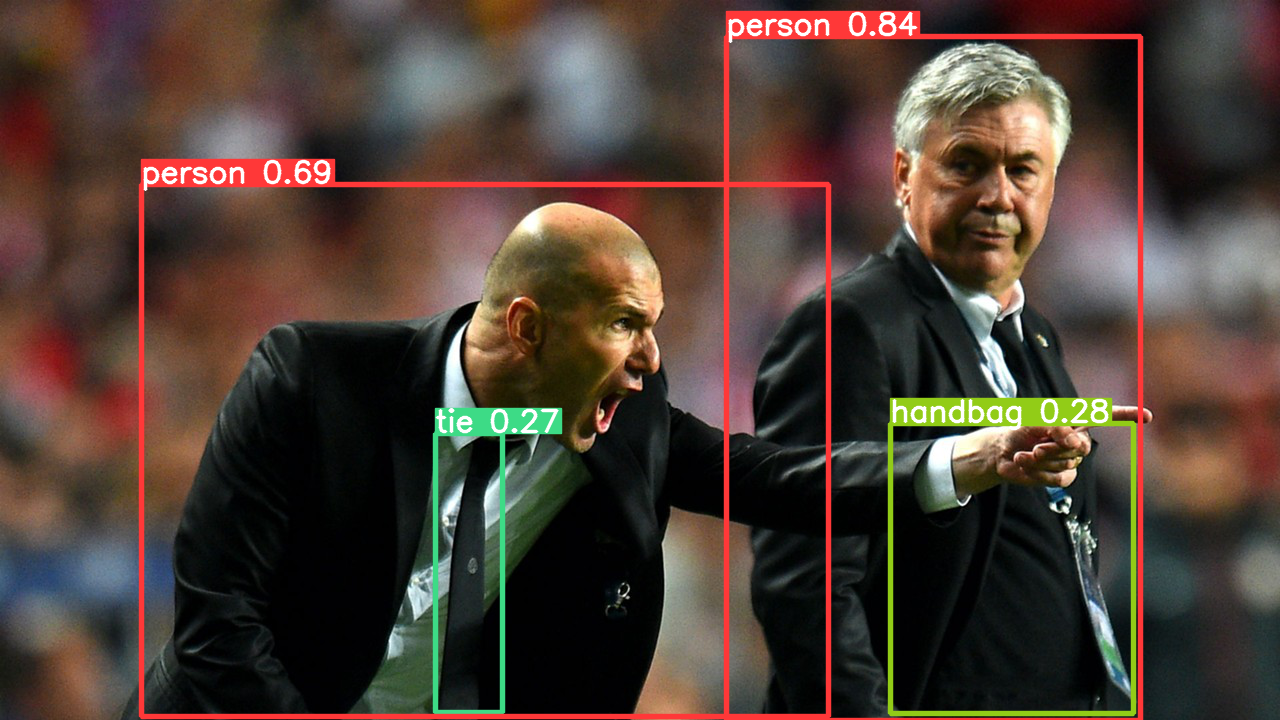

Saved 1 image to results


In [4]:
import yolov5

# load model
model = yolov5.load('fcakyon/yolov5n-v7.0')
  
# set model parameters
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

# set image
img = 'https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg'

# perform inference
results = model(img)

# inference with larger input size
results = model(img, size=640)

# inference with test time augmentation
results = model(img, augment=True)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()

# save results into "results/" folder
results.save(save_dir='results/')


## Be careful of filling up your machine!

> Some downloadable models are huge!

Every time you get a model from HuggingFace, you're losing a big chunk of your hard drive.

You'll want to clear out old models from time to time by deleting them from the command line. I found mine in `~/.cache/torch/hub/` on MacOS, and had to delete them when I encountered a `No space left on device` error. For different operating systems, you might find the location described in this [GitHub issue about deleting models](https://github.com/huggingface/transformers/issues/861).

## With great power, comes great responsibility

Despite how easy it is to copy the code provided online, it is important to understand what all of the code provided in the copyable examples does before copying it blindly.

- Make you understand the input format expected by the model
- Make sure you understand the format of the model output

Without these, it will be hard to integrate your model into your larger application, or will make your implementation prone to error.